In [21]:
pip install pandas numpy matplotlib seaborn mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("zepto_v1.csv")

df.head()


,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [23]:
df.shape

(3732, 9)

In [24]:
df.describe()

,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,quantity
count,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000
mean,15680.117899,7.617095,4.008574,14192.834941,387.843783,213.270900
std,16088.807618,9.211733,2.203511,13850.726265,678.096509,194.730976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,0.000000,2.000000,5500.000000,100.000000,50.000000
50%,11000.000000,6.000000,5.000000,10400.000000,225.000000,186.000000
75%,20000.000000,10.000000,6.000000,18400.000000,450.000000,340.000000
max,260000.000000,51.000000,6.000000,139900.000000,10000.000000,1500.000000


In [25]:
df.columns

Index(['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity',
       'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity'],
      dtype='object')

In [26]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna()

# Convert prices from paise to rupees if values are large
df['mrp'] = df['mrp'] / 100
df['discountedSellingPrice'] = df['discountedSellingPrice'] / 100


In [27]:
df.to_csv("zepto_cleaned.csv", index=False)


In [28]:
df

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,25.0,16,3,21.0,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,42.0,16,3,35.0,1000,False,1
2,Fruits & Vegetables,Tender Coconut,51.0,15,3,43.0,58,False,1
3,Fruits & Vegetables,Coriander Leaves,20.0,15,3,17.0,100,False,100
4,Fruits & Vegetables,Ladies Finger,14.0,14,3,12.0,250,False,250
...,...,...,...,...,...,...,...,...,...
3727,Health & Hygiene,Stayfree Secure Dry Cover Extra Large Sanitary...,42.0,2,0,41.0,406,True,7
3728,Health & Hygiene,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,105.0,15,0,89.0,100,True,100
3729,Health & Hygiene,Whisper Bindazzz Night Sanitary Pads XL Plus,185.0,0,0,185.0,870,True,15
3730,Health & Hygiene,Fine Life Cotton Balls,60.0,0,0,60.0,50,True,50


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


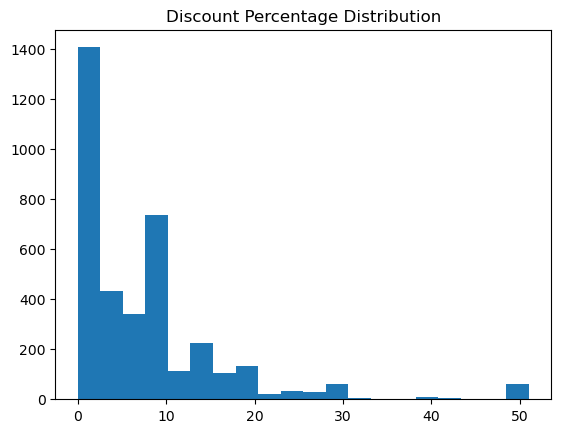

In [31]:
plt.hist(df['discountPercent'], bins=20)
plt.title("Discount Percentage Distribution")
plt.show()



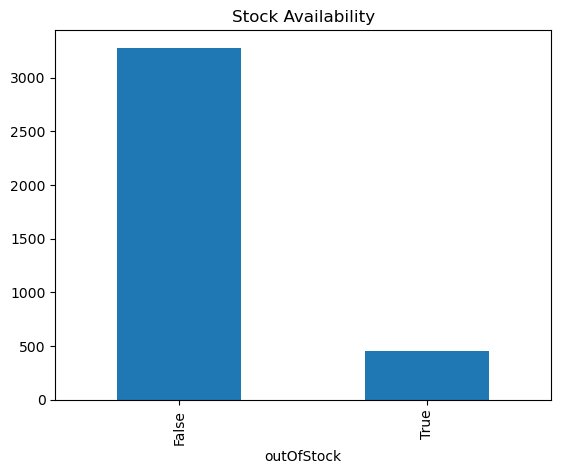

In [32]:
df['outOfStock'].value_counts().plot(kind='bar')
plt.title("Stock Availability")
plt.show()


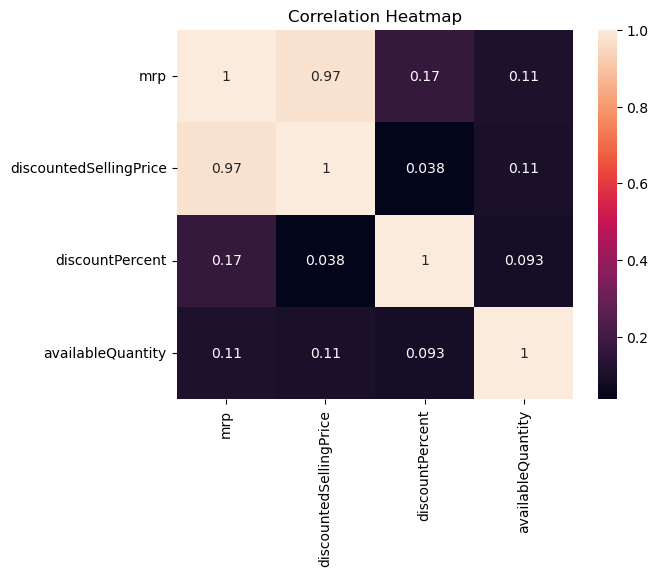

In [33]:
corr = df[['mrp','discountedSellingPrice','discountPercent','availableQuantity']].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()
